<a href="https://colab.research.google.com/github/Menatalla-Haggag/ITBLs/blob/main/Activity2_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [ ]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
pm10_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [ ]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-6-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
merged_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


In [ ]:
pollution_data = merged_data[['pm10','pm25','neighborhood','temperature', 'humidity', 'SensorID']]

In [ ]:
pollution_data.shape[0]

118495

In [ ]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [ ]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].min()

0.0

In [ ]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [ ]:
joined_table.show(2)

pm10,pm25,neighborhood,temperature,humidity,SensorID
11.35,5.91,Bronx Park,16.3,15.2,NYCP1_01A
1.18,1.18,Bronx Park,16.2,15.1,NYCP1_01A


print minimum and maximum pm10 values?

In [ ]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [ ]:
# Display the first 5 rows of the joined_table using .show()

joined_table.show(5)

pm10,pm25,neighborhood,temperature,humidity,SensorID
11.35,5.91,Bronx Park,16.3,15.2,NYCP1_01A
1.18,1.18,Bronx Park,16.2,15.1,NYCP1_01A
0.76,0.76,Bronx Park,16.1,15.1,NYCP1_01A
47.36,4.48,Bronx Park,16.1,15.2,NYCP1_01A
6.18,5.77,Bronx Park,16,15.2,NYCP1_01A


In [ ]:
# Print the number of rows and columns in the table

print('num of columns = ', joined_table.num_columns)
print('num of rows = ', joined_table.num_rows)

num of columns =  6
num of rows =  118495


In [ ]:
# Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).
rows_to_remove = set()

# Detect rows with missing values
for i in range(joined_table.num_rows):
    for j in range(joined_table.num_columns):
        value = joined_table.column(j).take(i)
        if isinstance(value,float) and np.isnan(value):
            rows_to_remove.add(i)
            break

if rows_to_remove:
   test = joined_table.remove(rows_to_remove)

print("Number of rows removed = ", len(rows_to_remove))

Number of rows removed =  0


In [ ]:
# Display columns and rows numbers after cleaning

print('num of columns = ', joined_table.num_columns)
print('num of rows = ', joined_table.num_rows)

num of columns =  6
num of rows =  118495


Another method to remove it from the dataframe before convert it to table

In [ ]:
# Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

df = Table.to_df(joined_table)
df_cleaned = df.dropna()
df_cleaned

,pm10,pm25,neighborhood,temperature,humidity,SensorID
0,11.35,5.91,Bronx Park,16.3,15.2,NYCP1_01A
1,1.18,1.18,Bronx Park,16.2,15.1,NYCP1_01A
2,0.76,0.76,Bronx Park,16.1,15.1,NYCP1_01A
3,47.36,4.48,Bronx Park,16.1,15.2,NYCP1_01A
4,6.18,5.77,Bronx Park,16.0,15.2,NYCP1_01A
...,...,...,...,...,...,...
118490,4.03,4.03,Longwood,14.0,86.0,NYCP1_01A
118491,6.20,6.15,Longwood,14.0,86.1,NYCP1_01A
118492,0.00,0.00,Longwood,14.1,86.0,NYCP1_01A
118493,2.49,2.49,Longwood,13.9,86.4,NYCP1_01A


In [ ]:
# Convert the cleaned dataframe to table

joined_table = Table().from_df(df_cleaned)

In [ ]:
# Display columns and rows numbers after cleaning

print('num of columns = ', joined_table.num_columns)
print('num of rows = ', joined_table.num_rows)

num of columns =  6
num of rows =  118494


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [ ]:
# Compute summary statistics (mean, median, min, max) for pm25

print('mean pm25 = ', np.mean(joined_table.column('pm25')))
print('median pm25 = ', np.median(joined_table.column('pm25')))
print('min pm25 = ', np.min(joined_table.column('pm25')))
print('max pm25 = ', np.max(joined_table.column('pm25')))

mean pm25 =  7.37451588675
median pm25 =  3.02
min pm25 =  0.0
max pm25 =  3267.02


In [ ]:
#Compute summary statistics (mean, median, min, max) for the attributes temperature

print('mean temperature = ', np.mean(joined_table.column('temperature')))
print('median temperature = ', np.median(joined_table.column('temperature')))
print('min temperature = ', np.min(joined_table.column('temperature')))
print('max temperature = ', np.max(joined_table.column('temperature')))

mean temperature =  8.24157728174
median temperature =  7.2
min temperature =  -7.9
max temperature =  10471.0


In [ ]:
# Compute summary statistics (mean, median, min, max) for the attributes humidity

print('mean humidity = ', np.mean(joined_table.column('humidity')))
print('median humidity = ', np.median(joined_table.column('humidity')))
print('min humidity = ', np.min(joined_table.column('humidity')))
print('max humidity = ', np.max(joined_table.column('humidity')))

mean humidity =  50.1548647622
median humidity =  46.2
min humidity =  0.0
max humidity =  104.2


In [ ]:
# Group the data by borough and calculate the average pm25 levels for each borough using .group()

joined_table2 = joined_table.select('neighborhood','pm25')
table_avg = joined_table2.group('neighborhood', np.average)

In [ ]:
# Display the results in a new table

table_avg

neighborhood,pm25 average
Allerton,4.20833
Astoria,1.29268
Belmont,15.053
Bronx Park,6.87867
Bronxdale,3.53619
Civic Center,4.09232
Claremont Village,5.6469
Concourse,8.44021
Concourse Village,6.84481
Country Club,12.8344


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

In [ ]:
# Preparing the table to create a bar chart
pm_avg = joined_table.select('neighborhood','pm25')
pm_avg = pm_avg.group('neighborhood',np.average)
pm_avg = pm_avg.sort('pm25 average', descending = True)
pm_avg.show(5)

neighborhood,pm25 average
Crotona Park,43.0689
Pelham Bay,24.0296
Tremont,21.8756
Morris Park,17.2426
Belmont,15.053


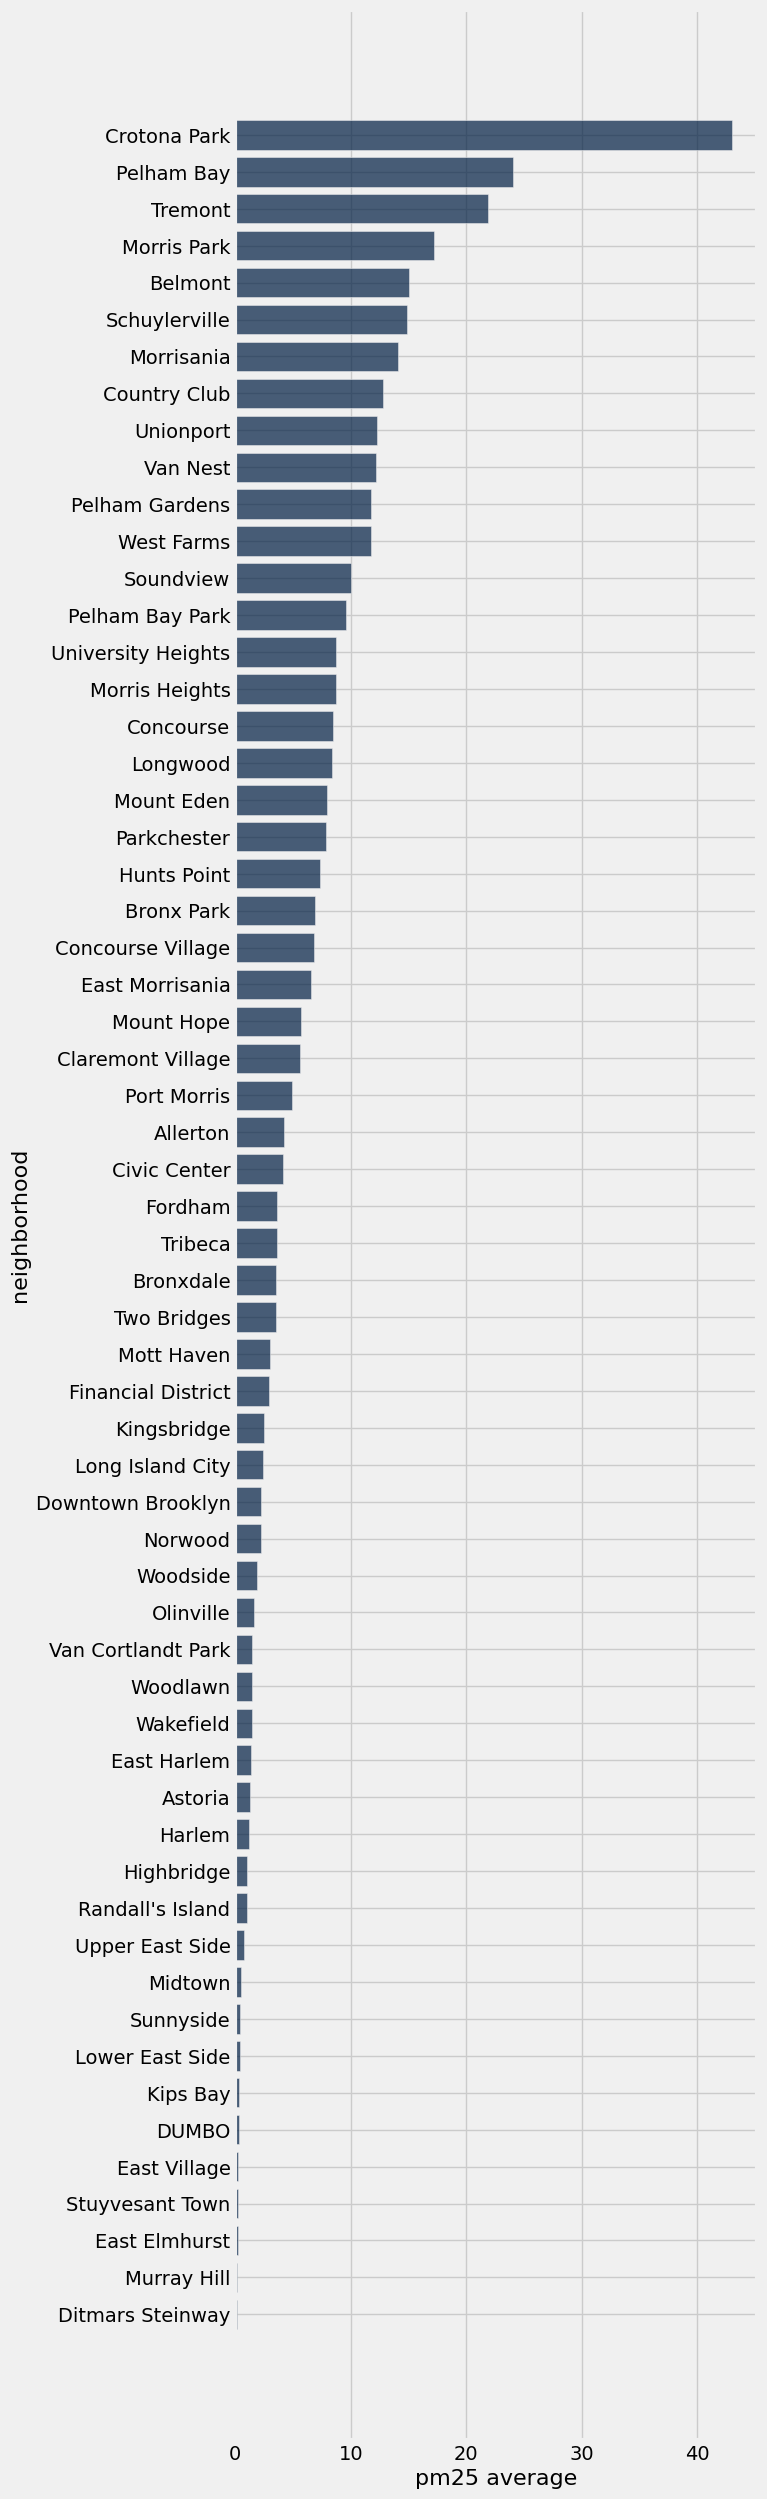

In [ ]:
# Create a bar chart showing the average pm25 levels for each borough using .barh()

pm_avg.barh('neighborhood')

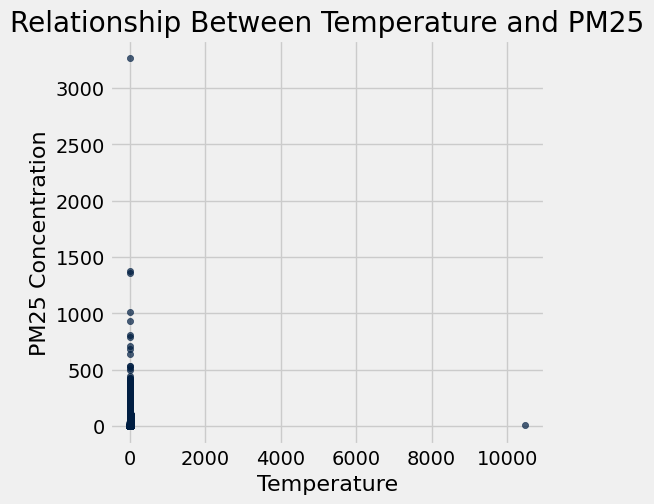

In [ ]:
# Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot

joined_table.scatter('temperature','pm25')

plt.title('Relationship Between Temperature and PM25')
plt.xlabel('Temperature')
plt.ylabel('PM25 Concentration')

plt.show()

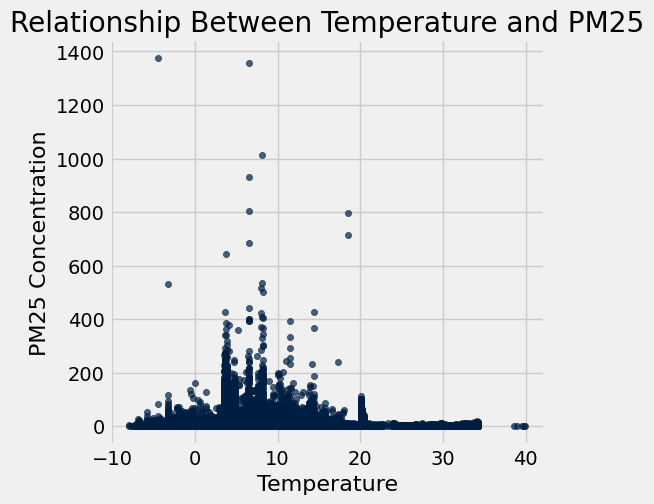

In [ ]:
# Remove outlaiers to better visualize the relationship

cleaned_t = joined_table.where('temperature', are.below(1000)).where('pm25', are.below(2000))
cleaned_t.scatter('temperature','pm25')

plt.title('Relationship Between Temperature and PM25')
plt.xlabel('Temperature')
plt.ylabel('PM25 Concentration')

plt.show()

In [ ]:
# Preparing the table to create a histogram

humidity = joined_table.select('neighborhood','humidity')
print(min(humidity.column('humidity')))
print(max(humidity.column('humidity')))

0.0
104.2


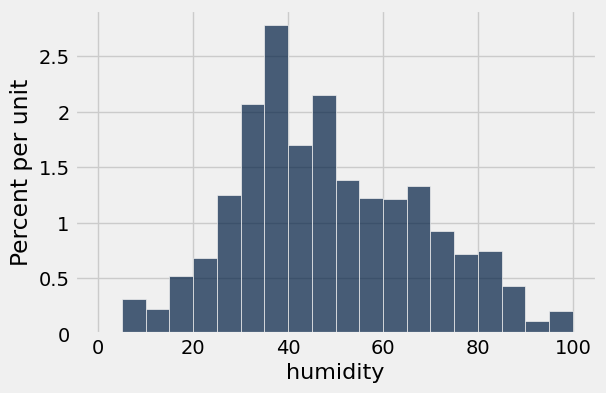

In [ ]:
# Create a histogram of humidity values across all neighborhoods using .hist()

humidity.hist('humidity',bins=np.arange(0,105,5))

# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [ ]:
"""
Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35

Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category
"""

def calculate_pm25_category(pm25):
    if pm25 <12:
        return 'Good'
    elif pm25 <35:
        return 'Moderate'
    else:
        return 'Unhealthy'

out = joined_table.apply(calculate_pm25_category,'pm25')
pm_cat = joined_table.with_columns('PM25_Category', out)
pm_cat

pm10,pm25,neighborhood,temperature,humidity,SensorID,PM25_Category
11.35,5.91,Bronx Park,16.3,15.2,NYCP1_01A,Good
1.18,1.18,Bronx Park,16.2,15.1,NYCP1_01A,Good
0.76,0.76,Bronx Park,16.1,15.1,NYCP1_01A,Good
47.36,4.48,Bronx Park,16.1,15.2,NYCP1_01A,Good
6.18,5.77,Bronx Park,16,15.2,NYCP1_01A,Good
0.73,0.73,Bronx Park,15.9,15.3,NYCP1_01A,Good
1.22,1.22,Bronx Park,15.8,15.4,NYCP1_01A,Good
5.82,4.57,Bronx Park,15.8,15.4,NYCP1_01A,Good
11.04,5.61,Bronx Park,15.7,15.5,NYCP1_01A,Good
1.29,1.29,Bronx Park,15.6,15.6,NYCP1_01A,Good


In [ ]:
# Count the number of sensors in each PM2.5 category and display the results using .group()

pm_cat.group(['SensorID','PM25_Category']).group('PM25_Category')

PM25_Category,count
Good,1
Moderate,1
Unhealthy,1


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [ ]:
# Randomly sample 10% of the rows from the table without replacement using .sample()

sampled_table = joined_table.sample(joined_table.num_rows * 10//100)
sampled_table

pm10,pm25,neighborhood,temperature,humidity,SensorID
0.21,0.21,Longwood,8.1,52.5,NYCP1_01A
42.22,28.45,Soundview,11.3,68.6,NYCP1_01A
0.72,0.72,Hunts Point,7.6,81.6,NYCP1_01A
0,0,Hunts Point,6.3,45.1,NYCP1_01A
80.02,3.02,Bronxdale,7,55.8,NYCP1_01A
0.8,0.8,Longwood,5.2,35.2,NYCP1_01A
0.1,0.1,Longwood,8,33.7,NYCP1_01A
1.02,1.02,Randall's Island,5.5,66.3,NYCP1_01A
17.68,12.97,Longwood,12.6,64.5,NYCP1_01A
161.98,6.38,Bronx Park,19.5,19.4,NYCP1_01A


In [ ]:
# Calculate the mean pm25 level for the sampled data

print('mean pm25 = ', np.mean(sampled_table.column('pm25')))

mean pm25 =  7.32109460714


In [ ]:
# Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list

pm_values = []
for i in range(100):
  sampled_table = joined_table.sample(joined_table.num_rows * 10//100)
  pm_values.append(np.mean(sampled_table.column('pm25')))

In [ ]:
# Convert the list to column in a table to use hist function

table_pm = Table().with_columns('pm_mean_values', pm_values)
table_pm

pm_mean_values
7.51478
7.33288
7.64023
7.39553
7.25072
7.34609
7.64008
7.37595
7.61979
7.28191


In [ ]:
print(min(pm_values))
print(max(pm_values))

7.00412861845
7.83974090641


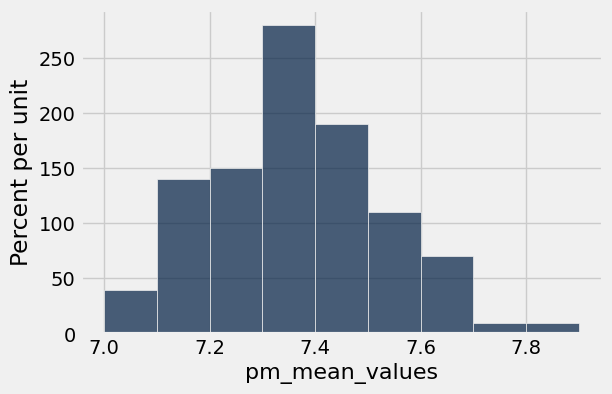

In [ ]:
# Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means

table_pm.hist('pm_mean_values', bins = np.arange(7,8,0.1))

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.